# HMM (Hidden Markov Model)

Скрытая марковская модель (СММ) — [статистическая модель](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5), имитирующая работу процесса, похожего на [марковский процесс](https://https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81) с неизвестными параметрами,  
и задачей ставится разгадывание неизвестных параметров на основе наблюдаемых. Полученные параметры могут быть использованы в дальнейшем анализе,  
 например, для распознавания образов. СММ может быть рассмотрена как простейшая [байесовская сеть доверия](https://https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C).


---

# Описание

Модель представляет из себя [марковскую цепь](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D1%86%D0%B5%D0%BF%D1%8C), для которой нам известны начальная вероятность и матрица вероятностей переходов. Скрытой она называется  
потому, что мы не имеем информации о ее текущем состоянии. Мы получаем информацию на основе некоторого наблюдения, в рассмотренном ниже алгоритме   
 мы будем использовать просто натуральное число от **1** до **N**, как индекс наблюдаемого события. Для каждого состояния скрытой марковской модели задан  
 вектор вероятности эмиссии, который характеризует вероятность наблюдения каждого события, когда модель находится в этом состоянии.  
  Совокупность таких векторов образует матрицу эмиссии.

Марковская модель **λ** задается как **λ={S,Ω,Π,A,B}**, где **S={s1…sn}** — состояния, **Ω={ω1…ωm}** — возможные события, **Π={π1…πn}** — начальные вероятности,  
 **A={aij}** — матрица переходов, а **B={biωk}** — вероятность наблюдения события ωk после перехода в состояние **si**.
Базовые алгоритмы

  
     
      
       
        



---


# Обучение
Параметр задачи обучения СММ — это нахождение лучшего результата. Пусть дана выходная последовательность или множество таких последовательностей,  
лучший набор состояний переходов и вероятности эмиссии. Задача, как правило, для получения максимальной вероятностной оценки параметров СММ,  
 учитывая множество выходных последовательностей. Не существует общего решения этой задачи, но для нахождения локального максимально  
 правдоподобного результата может быть эффективно использован [Алгоритм Баума-Велша](https:///neerc.ifmo.ru/wiki/index.php?title=%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B0%D1%83%D0%BC%D0%B0-%D0%92%D0%B5%D0%BB%D1%88%D0%B0). Если же СММ используется для прогнозирования временных рядов,  
  то можно использовать более изощренный метод, такой как [Марковская цепь Монте-Карло](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo), что оказалось благоприятным для нахождения одной модели   
  вероятности как с точки зрения точности, так и стабильности. Поскольку в МЦМК возникают значительные вычислительные нагрузки, то в случаях, когда   
  вычислительная масштабируемость представляет также интерес, можно также прибегнуть к вариационной аппроксимации [Байесовского вывода](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%B2%D1%8B%D0%B2%D0%BE%D0%B4). Действительно,  
 приближенный вариационный вывод предлагает вычислительную эффективность, сравнимую с максимизацией ожидания, ведь пока производящий профиль  
  точности лишь немного уступает точной МЦМК-типа Байесовского вывода.

---

# Структура скрытой марковской модели
В обычной марковской модели состояние видимо наблюдателю, поэтому вероятности переходов — единственный параметр. В скрытой марковской модели мы  
 можем следить лишь за переменными, на которые оказывает влияние данное состояние. Каждое состояние имеет вероятностное распределение среди  
  всех возможных выходных значений. Поэтому последовательность символов, сгенерированная СММ, даёт информацию о последовательности состояний.

Диаграмма, представленная ниже, показывает общую структуру СММ. Овалы представляют собой переменные со случайным значением. Случайная переменная **x(t)**  
 представляет собой значение скрытой переменной в момент времени  **t**. Случайная переменная **y(t)** — это значение наблюдаемой переменной в момент времени **t**.  
  Стрелки на диаграмме символизируют условные зависимости.

Из диаграммы становится ясно, что значение скрытой переменной **x(t)** (в момент времени **t**) зависит только от значения скрытой переменной **x(t-1)** (в момент **t-1**).  
 Это называется свойством Маркова.   
 Хотя в то же время значение наблюдаемой переменной **y(t)** зависит только от значения скрытой переменной **x(t)** (обе в момент времени **t**).
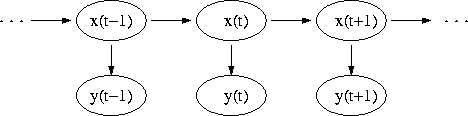


Вероятность увидеть последовательность image.png длины **L** равна 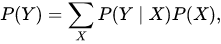 

здесь сумма пробегает по всем возможным последовательностям скрытых узлов image.png

Метод подсчёта полным перебором значений **P(Y)** — очень трудоёмкий для многих задач из реальной жизни в силу того, что количество возможных  
 последовательностей скрытых узлов очень велико. Но применение процедуры прямого-обратного хода позволяет существенно увеличить скорость вычислений.

---


# Базовые алгоритмы
Существуют три основных задачи, связанные с СММ:

*   [Алгоритм прямого-обратного хода:](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BF%D1%80%D1%8F%D0%BC%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%85%D0%BE%D0%B4%D0%B0) даны параметры модели и последовательность, требуется вычислить вероятность появления данной последовательности  
 (позволяет решить задачу).
*   [Алгоритм Витерби:](https://ru.wikipedia.org/wiki/Алгоритм_Витерби) даны параметры модели, требуется определить наиболее подходящую последовательность скрытых узлов, наиболее точно описывающую  
 данную модель (помогает при решении данной задачи).
*   [Алгоритм Баума-Велша:](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B0%D1%83%D0%BC%D0%B0_%E2%80%94_%D0%92%D0%B5%D0%BB%D1%88%D0%B0) дана выходная последовательность (или несколько) с дискретными значениями, требуется обучить СММ на данном выходе.

# Примеры использования
[Кластерный анализ](https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7) — многомерная статистическая процедура, выполняющая сбор данных, содержащих информацию о выборке объектов,  
 и затем упорядочивающая объекты в сравнительно однородные группы.

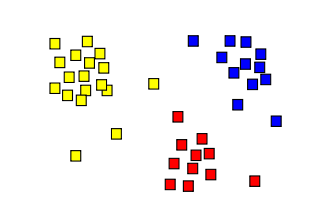

[Регрессионный анализ](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7) — статистический метод исследования влияния одной или нескольких независимых переменных **X1,X2…Xp** на зависимую переменную **Y**.
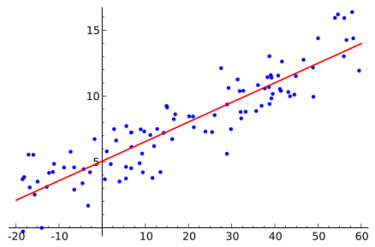

[Задача классификации](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8) — формализованная задача, в которой имеется множество объектов (ситуаций), разделённых некоторым образом на классы

# Список литературы



1.   https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D1%80%D1%8B%D1%82%D0%B0%D1%8F_%D0%BC%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C

2.   https://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D0%BA%D1%80%D1%8B%D1%82%D1%8B%D0%B5_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8

3.   https://ru.coursera.org/lecture/bioinformatika/skrytyie-markovskiie-modieli-hidden-markov-models-Tn6zw
4.   https://ru.wikibooks.org/wiki/%D0%A1%D0%BA%D1%80%D1%8B%D1%82%D1%8B%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8

5.   https://logic.pdmi.ras.ru/~sergey/oldsite/teaching/asr/notes-09-hmm.pdf







